# Reading and plotting data in Python

Today, we are going to look at several Python packages to read common data formats.

In [2]:
import folium
import geopandas as gpd
import matplotlib.pyplot as plt
import netCDF4 as nc
import numpy as np
import pandas as pd
import pycrs
import rasterio

from folium.plugins import MarkerCluster
from rasterio.mask import mask
from rasterio.plot import show

The data files used in this notebook are downloaded from:

https://www.naturalearthdata.com/

and:

https://www.sciencebase.gov/catalog/item/5cfeb4cce4b0156ea5645056

## Vector data: geopandas

The Python package geopandas expands on pandas to be able to read vector data with a geospatial component. To know more about geopandas, you can lok at the following websites:

https://geopandas.org/

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-vector-data-python/

https://geohackweek.github.io/vector/

First download the file from:

https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

(Go to Admin 0 – Countries and Download countries) 

In [3]:
countries = gpd.read_file('ne_110m_admin_0_countries/ne_110m_admin_0_countries.shp')

Geopandas looks a lot like pandas. The main difference is that you have now a geometry column when you can have points, lines, polygons etc.

In [4]:
countries.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,Fiji,FJI,...,피지,Fiji,Fidżi,Fiji,Фиджи,Fiji,Fiji,Fiji,斐濟,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,United Republic of Tanzania,TZA,...,탄자니아,Tanzania,Tanzania,Tanzânia,Танзания,Tanzania,Tanzanya,Tanzania,坦桑尼亚,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,Western Sahara,SAH,...,서사하라,Westelijke Sahara,Sahara Zachodnia,Saara Ocidental,Западная Сахара,Västsahara,Batı Sahra,Tây Sahara,西撒哈拉,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,Canada,CAN,...,캐나다,Canada,Kanada,Canadá,Канада,Kanada,Kanada,Canada,加拿大,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


In [5]:
type(countries)

geopandas.geodataframe.GeoDataFrame

You can look at the geographical bounds of your shapefile:

In [6]:
countries.total_bounds

array([-180.     ,  -90.     ,  180.     ,   83.64513])

and at the projection:

In [7]:
countries.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

We can look at the type of geometries included in the shapefile. We can see that there are polygons and multipolygons.

In [8]:
countries.geom_type

0      MultiPolygon
1           Polygon
2           Polygon
3      MultiPolygon
4      MultiPolygon
           ...     
172         Polygon
173         Polygon
174         Polygon
175         Polygon
176         Polygon
Length: 177, dtype: object

Let us look at the dimensions of the dataset

In [9]:
countries.shape

(177, 95)

and plot:

<AxesSubplot:>

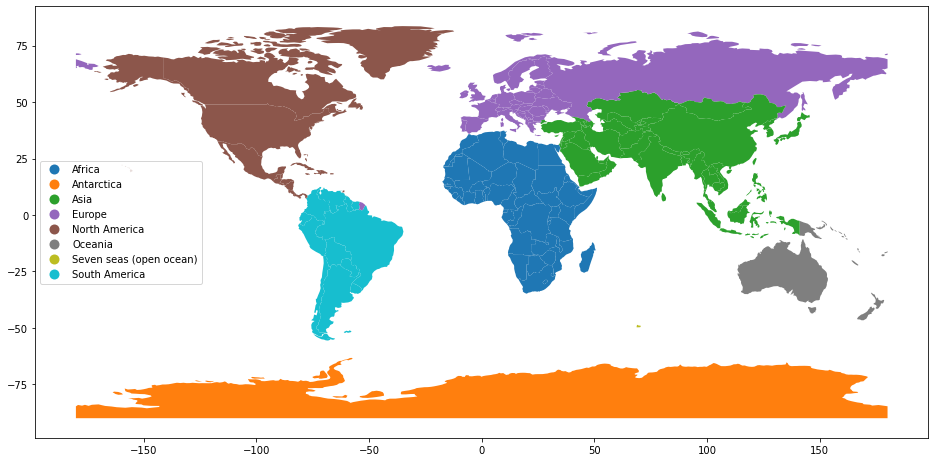

In [10]:
fig, ax = plt.subplots(figsize=(16, 12))
countries.plot(column='CONTINENT', ax=ax, categorical=True, legend=True, legend_kwds={'loc':'center left'})

Now let us cities to the map.

The file can be downloaded at:

https://www.naturalearthdata.com/downloads/110m-cultural-vectors/

(Go to Populated Places and Download populated places)

In [11]:
cities = gpd.read_file('ne_110m_populated_places/ne_110m_populated_places.shp')

In [12]:
cities.head()

,SCALERANK,NATSCALE,LABELRANK,FEATURECLA,NAME,NAMEPAR,NAMEALT,DIFFASCII,NAMEASCII,ADM0CAP,...,name_ja,name_ko,name_nl,name_pl,name_sv,name_tr,name_vi,wdid_score,ne_id,geometry
0,8,10,3,Admin-0 capital,Vatican City,None,None,0,Vatican City,1.0,...,バチカン,바티칸 시국,Vaticaanstad,Watykan,Vatikanstaten,Vatikan,Thành Vatican,4,1159127243,POINT (12.45339 41.90328)
1,7,20,0,Admin-0 capital,San Marino,None,None,0,San Marino,1.0,...,サンマリノ市,산마리노,San Marino,San Marino,San Marino,San Marino,Thành phố San Marino,4,1159146051,POINT (12.44177 43.93610)
2,7,20,0,Admin-0 capital,Vaduz,None,None,0,Vaduz,1.0,...,ファドゥーツ,파두츠,Vaduz,Vaduz,Vaduz,Vaduz,Vaduz,4,1159146061,POINT (9.51667 47.13372)
3,6,30,8,Admin-0 capital alt,Lobamba,None,None,0,Lobamba,0.0,...,ロバンバ,로밤바,Lobamba,Lobamba,Lobamba,Lobamba,Lobamba,4,1159146343,POINT (31.20000 -26.46667)
4,6,30,8,Admin-0 capital,Luxembourg,None,None,0,Luxembourg,1.0,...,ルクセンブルク市,룩셈부르크,Luxemburg,Luksemburg,Luxemburg,Lüksemburg,Luxembourg,4,1159146437,POINT (6.13000 49.61166)


We now have point type geometries in our dataset:

In [13]:
cities.geom_type

0      Point
1      Point
2      Point
3      Point
4      Point
       ...  
238    Point
239    Point
240    Point
241    Point
242    Point
Length: 243, dtype: object

We can plot the data. To avoid a too busy figure, we are going to annotate only the biggest cities:

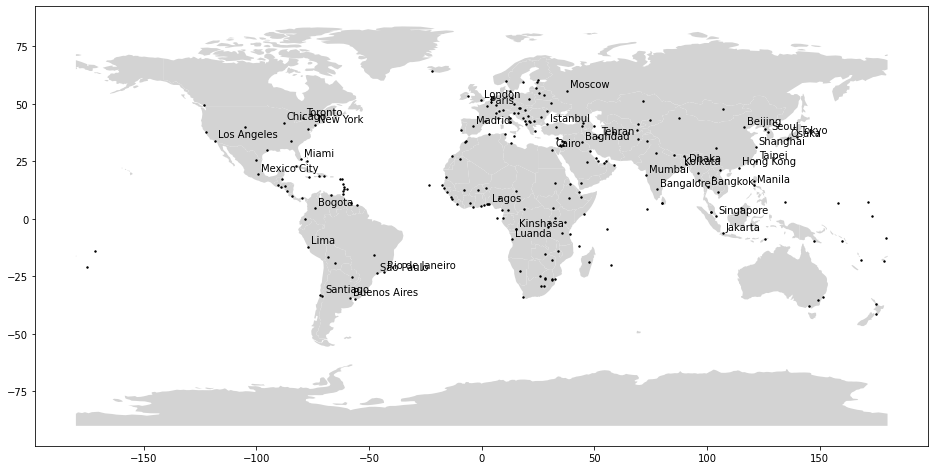

In [14]:
fig, ax = plt.subplots(figsize=(16, 12))
countries.plot(ax=ax, color='lightgrey')
cities.plot(ax=ax, color='black', markersize=2)
big_cities = cities.loc[cities.POP_MAX > 5000000]
for x, y, label in zip(big_cities.geometry.x, big_cities.geometry.y, big_cities.NAME):
    ax.annotate(label, xy=(x, y), xytext=(3, 3), textcoords="offset points")

We can modify the projection of the dataset. For instance, we are going to look at the following projection: USA Contiguous Albers Equal Area Conic.

(See reference at https://spatialreference.org/ref/sr-org/7301/)

More info on projections is available here:

https://geohackweek.github.io/visualization/

In [15]:
projected_countries = countries.to_crs({'init': 'epsg:7301'})

/opt/anaconda3/envs/uwdsgeo/lib/python3.9/site-packages/pyproj/crs/crs.py:53: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  return _prepare_from_string(" ".join(pjargs))


<AxesSubplot:>

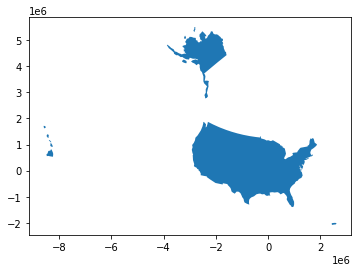

In [16]:
projected_countries.loc[projected_countries.SOVEREIGNT == 'United States of America'].plot()

In [17]:
projected_countries.crs

<Projected CRS: EPSG:7301>
Name: NAD83(2011) / InGCS Gibson (m)
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - Indiana - Gibson county.
- bounds: (-87.98, 38.16, -87.31, 38.54)
Coordinate Operation:
- name: InGCS Gibson (m)
- method: Transverse Mercator
Datum: NAD83 (National Spatial Reference System 2011)
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

As with pandas, you can also group rwos by categories, and carry out operations on the groups:

In [18]:
continents = countries.dissolve(by='CONTINENT', aggfunc='sum')

In [19]:
continents.POP_EST

CONTINENT
Africa                     1219176238
Antarctica                       4050
Asia                       4389144868
Europe                      746398461
North America               573042112
Oceania                      36782844
Seven seas (open ocean)           140
South America               418540749
Name: POP_EST, dtype: int64

## Raster data: rasterio

To know more about rasterio, you can look at the following websites:

https://rasterio.readthedocs.io/en/latest/

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-raster-data-python/

https://geohackweek.github.io/raster/

First download the file of global topography from:

https://www.naturalearthdata.com/downloads/50m-raster-data/50m-cross-blend-hypso/

(Go to Cross Blended Hypso with Shaded Relief and Download small size)


In [20]:
elevation = rasterio.open('HYP_50M_SR/HYP_50M_SR.tif')

Let us have a look at the dimensions of the data:

In [21]:
elevation.height

5400

In [22]:
elevation.width

10800

In [23]:
elevation.indexes

(1, 2, 3)

In [24]:
elevation.dtypes

('uint8', 'uint8', 'uint8')

and at the boundaries of the dataset:

In [25]:
elevation.bounds

BoundingBox(left=-179.99999999999997, bottom=-89.99999999998201, right=179.99999999996405, top=90.0)

In [26]:
elevation.transform

Affine(0.03333333333333, 0.0, -179.99999999999997,
       0.0, -0.03333333333333, 90.0)

In [27]:
print(elevation.transform * (0, 0)) # North West corner
print(elevation.transform * (elevation.width, elevation.height)) # South East corner

(-179.99999999999997, 90.0)
(179.99999999996405, -89.99999999998201)


Here is the projection used for the data:

In [28]:
elevation.crs

CRS.from_epsg(4326)

How to interpret the data: There are three layers for the three colors red, green, and blue:

In [29]:
print(elevation.colorinterp[0])
print(elevation.colorinterp[1])
print(elevation.colorinterp[2])

ColorInterp.red
ColorInterp.green
ColorInterp.blue


In [30]:
print(np.min(elevation.read(1)), np.max(elevation.read(1)))
print(np.min(elevation.read(2)), np.max(elevation.read(2)))
print(np.min(elevation.read(3)), np.max(elevation.read(3)))

59 255
79 255
75 255


Let us now plot the data:

In [31]:
image = elevation.read()

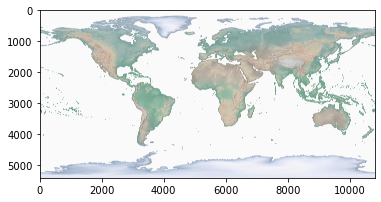

<AxesSubplot:>

In [32]:
show(image)

In [33]:
import earthpy as et
import earthpy.plot as ep

What can we do know if we only want elevations for the United States? We are first goining to select the polygons corresponding to the United States from the shapefile that we looked at at the beginning of the notebook.

In [34]:
usa = countries.loc[countries.SOVEREIGNT == 'United States of America']

In [35]:
usa

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,ADMIN,ADM0_A3,...,NAME_KO,NAME_NL,NAME_PL,NAME_PT,NAME_RU,NAME_SV,NAME_TR,NAME_VI,NAME_ZH,geometry
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,United States of America,USA,...,미국,Verenigde Staten van Amerika,Stany Zjednoczone,Estados Unidos,Соединённые Штаты Америки,USA,Amerika Birleşik Devletleri,Hoa Kỳ,美国,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."
45,Admin-0 country,1,5,United States of America,US1,1,2,Dependency,Puerto Rico,PRI,...,푸에르토리코,Puerto Rico,Portoryko,Porto Rico,Пуэрто-Рико,Puerto Rico,Porto Riko,Puerto Rico,波多黎各,"POLYGON ((-66.28243 18.51476, -65.77130 18.426..."


In [36]:
def getFeatures(gdf):
    """Function to parse features from GeoDataFrame in such a manner that rasterio wants them"""
    import json
    return [json.loads(gdf.to_json())['features'][0]['geometry']]

In [37]:
coords = getFeatures(usa)

In [38]:
out_img, out_transform = mask(elevation, shapes=coords, crop=True)

In [39]:
out_meta = elevation.meta.copy()

In [40]:
epsg_code = int(elevation.crs.data['init'][5:])

In [41]:
out_meta.update({"driver": "GTiff",
                 "height": out_img.shape[1],
                 "width": out_img.shape[2],
                 "transform": out_transform,
                 "crs": pycrs.parse.from_epsg_code(epsg_code).to_proj4()})

In [42]:
out_tif = 'usa_elevation.tif'

In [43]:
with rasterio.open(out_tif, "w", **out_meta) as dest:
    dest.write(out_img)

In [44]:
clipped = rasterio.open(out_tif)

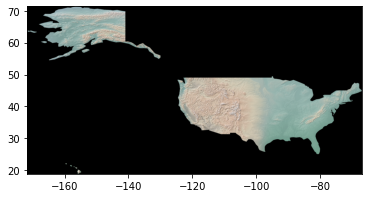

<AxesSubplot:>

In [45]:
show(clipped)

## Reading geojson files with geopandas

Shapefiles are not the only kind of files that we can read with geopandas. Let us look at an example of reading data from a geojson file (which is a special case of json file with geographical coordinates).

You can find more about json in:

https://www.earthdatascience.org/courses/use-data-open-source-python/intro-to-apis/apis-in-python/

In [46]:
url = 'https://www.nps.gov/lib/npmap.js/4.0.0/examples/data/national-parks.geojson'

In [47]:
parks = gpd.read_file(url)

In [48]:
parks.head()

,Code,Name,geometry
0,FRLA,Frederick Law Olmsted National Historic Site,POINT (-71.13113 42.32551)
1,GLDE,Gloria Dei Church National Historic Site,POINT (-75.14358 39.93438)
2,JOFI,John F Kennedy National Historic Site,POINT (-71.12296 42.34660)
3,LONG,Longfellow House - Washington's Headquarters N...,POINT (-71.12590 42.37702)
4,ROWI,Roger Williams National Memorial,POINT (-71.41080 41.82835)


Let us plot the data.

folium is a nice Python package for visualization. You can learn more in the following notebook:

https://github.com/geohackweek/tutorial_contents/blob/master/visualization/notebooks/foliumTutorial.ipynb

In [49]:
m = folium.Map(location=[40, -100], zoom_start=4)
folium.GeoJson(parks).add_to(m)
marker_cluster = MarkerCluster().add_to(m)
m

We are going to focus on the parks in Washington State:

In [50]:
parks_WA = parks.iloc[[94, 127, 187, 228, 286, 294, 295, 297, 299, 300, 302]].reset_index()

We create a list of locations to add popups to the map.

In [51]:
locations = []
for index in range(0, len(parks_WA)):
    location = [parks_WA['geometry'][index].y, parks_WA['geometry'][index].x]
    locations.append(location)

In [52]:
m = folium.Map(location=[47, -121], zoom_start=7)
marker_cluster = MarkerCluster().add_to(m)
for point in range(0, len(locations)):
    folium.Marker(location = locations[point], popup=parks_WA['Name'].iloc[point]).add_to(marker_cluster)
m

## Netcdf

There are many other data formats. We are going to have a brief look at the Python package netCDF4.

The data files for this part can be downloaded here:

https://www.sciencebase.gov/catalog/item/5cfeb4cce4b0156ea5645056

In [52]:
file1 = 'NCM_GeologicFrameworkGrids.nc'
file2 = 'NCM_SpatialGrid.nc'
geology = nc.Dataset(file1)
grid = nc.Dataset(file2)

In [53]:
geology

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    dimensions(sizes): dim1(3201), dim2(4901), dim9(31)
    variables(dimensions): |S1 Notes(dim9), float32 Surface Elevation(dim2, dim1), float32 Bedrock Elevation(dim2, dim1), float32 Bottom Cenozoic Elevation(dim2, dim1), float32 Bottom Phanerozoic Elevation(dim2, dim1), float32 Mid Crustal Elevation(dim2, dim1), float32 Moho Elevation(dim2, dim1), float32 Top Ocean Plate Elevation(dim2, dim1)
    groups: 

In [54]:
geology['Surface Elevation']

<class 'netCDF4._netCDF4.Variable'>
float32 Surface Elevation(dim2, dim1)
unlimited dimensions: 
current shape = (4901, 3201)
filling on, default _FillValue of 9.969209968386869e+36 used

In [55]:
np.shape(geology['Surface Elevation'])

(4901, 3201)

In [56]:
geology['Surface Elevation'][3246, 1234]

masked_array(data=242.28735,
             mask=False,
       fill_value=1e+20,
            dtype=float32)

In [57]:
x = grid['x'][0:4901, 0:3201]
y = grid['y'][0:4901, 0:3201]
elevation = geology['Surface Elevation'][0:4901, 0:3201]

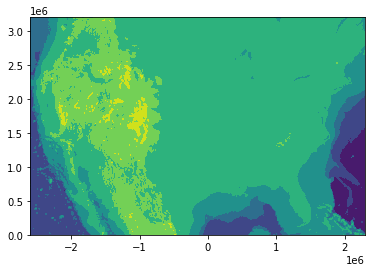

In [58]:
plt.contourf(x, y, elevation)

After we read data, the next question is often how to visualize them. There is an entire course in CSE about visualization:

https://courses.cs.washington.edu/courses/cse512/21sp/

You may have a closer look at all the notebooks about altair, which is a nice plotting package in Python:

https://github.com/uwdata/visualization-curriculum